Classify exons and introns using linear models and
implement the following:
1. Three versions of gradient descent:
o Batch Gradient Descent.
o Mini-Batch Gradient Descent.
o Stochastic Gradient Descent.
2. Three regularization techniques:
o Ridge Regression (L2).
o Lasso Regression (L1).
o Elastic Net (Combination of L1 and L2).
3. Optimize hyperparameters for each model using the validation set.
4. Generate learning curves for each optimized model.






In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

1. Use the same data sets (training, validation, and testing) from HW2.

In [10]:
X_train = np.load("/content/drive/MyDrive/mlinmb/2/feature_matrix_train.npy")
y_train = np.load("/content/drive/MyDrive/mlinmb/2/label_array_train.npy")

X_valid = np.load("/content/drive/MyDrive/mlinmb/2/feature_matrix_valid.npy")
y_valid = np.load("/content/drive/MyDrive/mlinmb/2/label_array_valid.npy")

X_test = np.load("/content/drive/MyDrive/mlinmb/2/feature_matrix_test.npy")
y_test = np.load("/content/drive/MyDrive/mlinmb/2/label_array_test.npy")


2. Rescale your data using z-score normalization or min-max rescaling.





In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

3. Write one Jupyter notebook.
4. Design six binary classifiers based on the six techniques mentioned above. Here’s how
you can manage batch size indirectly for mini-batch training:
a. Split the data into mini batches manually: Divide your training data into chunks
of the desired batch size.
b. Iteratively train on each batch: Use the partial_fit method of the SGDClassifier to
update the model incrementally.
5. Optimize these hyperparameters:
a. Learning Rate: Experiment with a range (e.g., 0.0001 to 0.1).
b. Number of Epochs and
c. Batch Size (for mini-batch GD).

Training Batch GD + L2 model 1/3 with eta=0.001
Training Batch GD + L2 model 2/3 with eta=0.01
Training Batch GD + L2 model 3/3 with eta=0.1
Training Mini-Batch GD + ElasticNet model 1/2 with eta=0.001
Training Mini-Batch GD + ElasticNet model 2/2 with eta=0.01
Training Stochastic GD + L1 model 1/3 with eta=0.001
Training Stochastic GD + L1 model 2/3 with eta=0.01
Training Stochastic GD + L1 model 3/3 with eta=0.1
Training Ridge model 1/3 with alpha=0.1
Training Ridge model 2/3 with alpha=1.0
Training Ridge model 3/3 with alpha=10.0
Training Lasso model 1/3 with C=0.01
Training Lasso model 2/3 with C=0.1
Training Lasso model 3/3 with C=1.0
Training Elastic Net model 1/3 with l1_ratio=0.3
Training Elastic Net model 2/3 with l1_ratio=0.5
Training Elastic Net model 3/3 with l1_ratio=0.7
Best models with parameters:
Batch GD + L2: Test accuracy = 0.8900, Parameters: {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.15}
Mini-Batch GD + ElasticNet: Test accuracy = 0.9159, Parameters: {'alpha': 0.

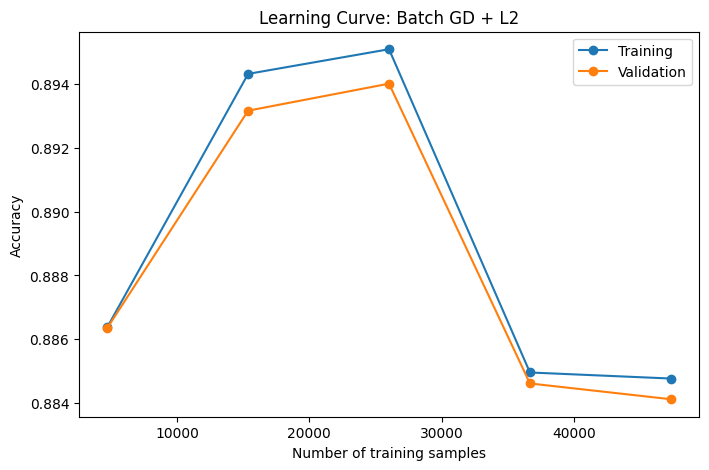

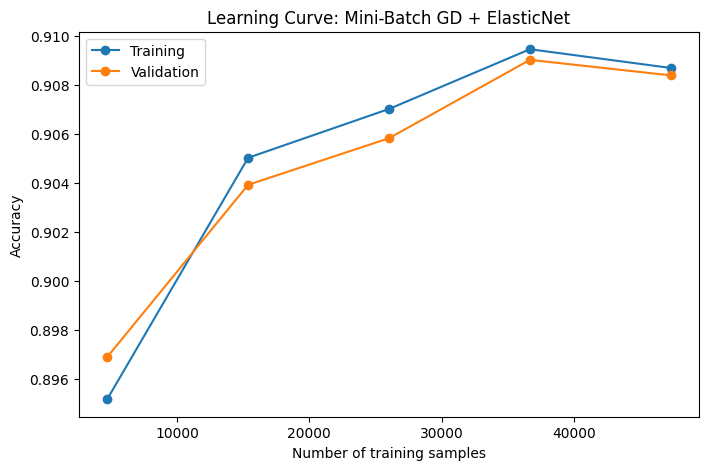

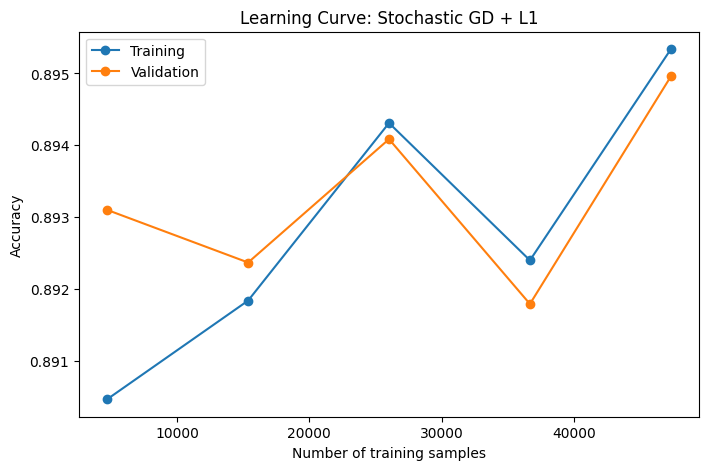

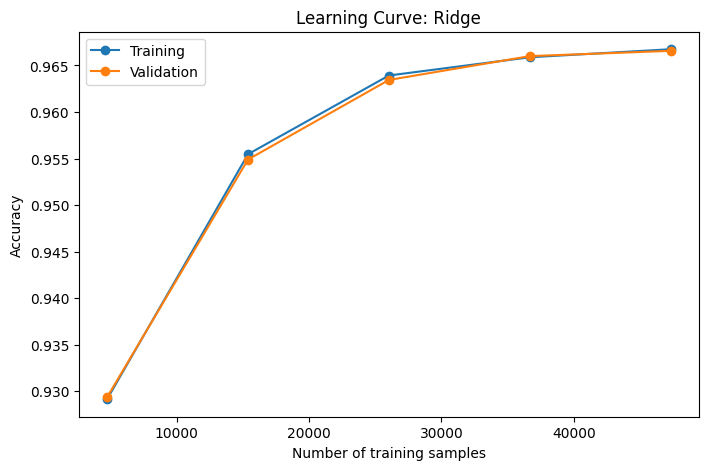

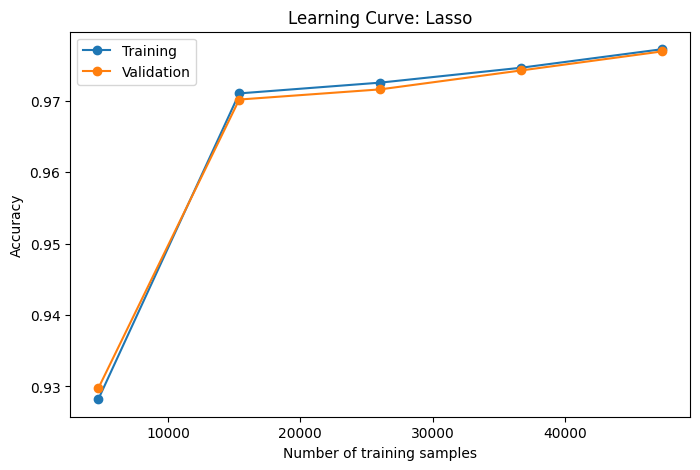

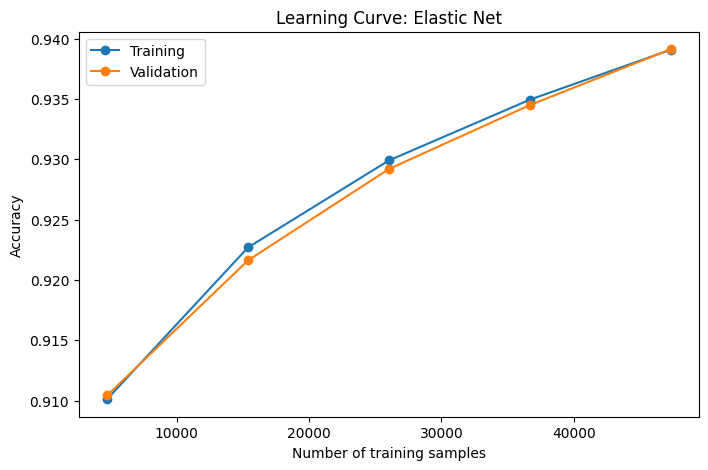

In [18]:
def create_batches(X, y, batch_size):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    for i in range(0, len(X), batch_size):
        yield X[indices[i:i+batch_size]], y[indices[i:i+batch_size]]


best_models = []

# Model 1: Batch GD + L2
best_acc = 0
for i, eta in enumerate([0.001, 0.01, 0.1]):
    print(f"Training Batch GD + L2 model {i+1}/{3} with eta={eta}")
    model = SGDClassifier(
        loss='log_loss',
        penalty='l2',
        alpha=0.001,
        learning_rate='constant',
        eta0=eta,
        max_iter=100
    )
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid_scaled))
    if acc > best_acc:
        best_acc = acc
        best_model = model
best_models.append(('Batch GD + L2', best_model))

# Model 2: Mini-Batch GD + ElasticNet
best_acc = 0
for i, eta in enumerate([0.001, 0.01]):
    print(f"Training Mini-Batch GD + ElasticNet model {i+1}/{2} with eta={eta}")
    for batch_size in [32, 64]:
        model = SGDClassifier(
            loss='log_loss',
            penalty='elasticnet',
            l1_ratio=0.5,
            learning_rate='constant',
            eta0=eta,
            max_iter=100
        )
        for _ in range(100):
            for X_batch, y_batch in create_batches(X_train_scaled, y_train, batch_size):
                model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        acc = accuracy_score(y_valid, model.predict(X_valid_scaled))
        if acc > best_acc:
            best_acc = acc
            best_model = model
best_models.append(('Mini-Batch GD + ElasticNet', best_model))

# Model 3: Stochastic GD + L1
best_acc = 0
for i, eta in enumerate([0.001, 0.01, 0.1]):
    print(f"Training Stochastic GD + L1 model {i+1}/{3} with eta={eta}")
    model = SGDClassifier(
        loss='log_loss',
        penalty='l1',
        alpha=0.001,
        learning_rate='constant',
        eta0=eta,
        max_iter=100
    )
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid_scaled))
    if acc > best_acc:
        best_acc = acc
        best_model = model
best_models.append(('Stochastic GD + L1', best_model))

# Model 4: Ridge (L2)
best_acc = 0
for i, alpha in enumerate([0.1, 1.0, 10.0]):
    print(f"Training Ridge model {i+1}/{3} with alpha={alpha}")
    model = RidgeClassifier(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid_scaled))
    if acc > best_acc:
        best_acc = acc
        best_model = model
best_models.append(('Ridge', best_model))

# Model 5: Lasso (L1)
best_acc = 0
for i, C in enumerate([0.01, 0.1, 1.0]):
    print(f"Training Lasso model {i+1}/{3} with C={C}")
    model = LogisticRegression(tol=1e-5,
        penalty='l1',
        C=C,
        solver='liblinear',
        max_iter=100
    )
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid_scaled))
    if acc > best_acc:
        best_acc = acc
        best_model = model
best_models.append(('Lasso', best_model))

# Model 6: Elastic Net
best_acc = 0
for i, l1_ratio in enumerate([0.3, 0.5, 0.7]):
    print(f"Training Elastic Net model {i+1}/{3} with l1_ratio={l1_ratio}")
    model = LogisticRegression(
        penalty='elasticnet',
        l1_ratio=l1_ratio,
        C=1.0,
        solver='saga',
        max_iter=1000
    )
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_valid, model.predict(X_valid_scaled))
    if acc > best_acc:
        best_acc = acc
        best_model = model
best_models.append(('Elastic Net', best_model))

# Ocena modeli
print("Best models with parameters:")
for name, model in best_models:
    params = model.get_params()
    best_params = {k: v for k, v in params.items() if k in ['eta0', 'alpha', 'C', 'l1_ratio']}
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name}: Test accuracy = {acc:.4f}, Parameters: {best_params}")

# Krzywe uczenia
def plot_learning_curve(model, name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train, cv=3,
        scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, np.mean(train_scores, 1), 'o-', label="Training")
    plt.plot(train_sizes, np.mean(val_scores, 1), 'o-', label="Validation")
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Number of training samples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

for name, model in best_models:
    plot_learning_curve(model, name)


I trained 6 models using various optimization and regularization techniques. I tuned hyperparameters (η, α, C, batch size, l1_ratio) and evaluated on validation set for model selection, then tested on test data. The best accuracy was on models with lasso l1 (c=1) and ridge l2 (α = 1). They were trained on 1000 iterations. The best performing SGD models was Mini-Batch GD + ElasticNet with accuracy 91.6%. I generated learning curves that plotted accuracy vs number of training samples. I chose that over epochs to see how models behave with growing dataset.

Knowledge:
1. Read the slides about linear models.
2. Answer the following questions in the same Jupyter notebook that includes the
classifiers described above, each in one cell:

a. Which linear regression training algorithm can you use if you have a training set
with millions of features?

b. Suppose the features in your training set have very different scales. Which
algorithms might suffer from this, and how? What can you do about it?


c. Can gradient descent get stuck in a local minimum when training a logistic
regression model?

d. Do all gradient descent algorithms lead to the same model, provided you let
them run long enough?

e. Suppose you use batch gradient descent and you plot the validation error at
every epoch. If you notice that the validation error consistently goes up, what is
likely going on? How can you fix this?

a. Stochastic Gradient Descent or Mini-Batch Gradient Descent, because they dont use the whole dataset to compute gradient, making it slow when the dataset is large

b. Gradient Descent - the cost function will be elongated, and the gradient descent updates will move too slowly in some directions and too quickly in others. To solve this problem we should scale the data.

c. No, because cost function of logistic regression is convex and ontinuous function with a slope that never changes abruptly, which means it has a single global minimum and no local minima.

d. It depends on the parameters we choose, if they are wrong model may not find the right solution, but if they are right it will

e. overfitting or too high a learning rate - solutions may be to decrese learning rate or use regularization